In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

## Import Mobility Data

In [2]:
# keep FIPS as string to preserve leading zeroes

In [3]:
mob = pd.read_csv(r"/Users/philip.ballentine/Downloads/Region_Mobility_Report_CSVs/2020_US_Region_Mobility_Report.csv", dtype={'census_fips_code': 'str'} )

In [4]:
mob['date'] = mob['date'].astype('datetime64')

In [5]:
mob.dtypes

country_region_code                                           object
country_region                                                object
sub_region_1                                                  object
sub_region_2                                                  object
metro_area                                                   float64
iso_3166_2_code                                               object
census_fips_code                                              object
date                                                  datetime64[ns]
retail_and_recreation_percent_change_from_baseline           float64
grocery_and_pharmacy_percent_change_from_baseline            float64
parks_percent_change_from_baseline                           float64
transit_stations_percent_change_from_baseline                float64
workplaces_percent_change_from_baseline                      float64
residential_percent_change_from_baseline                     float64
dtype: object

In [6]:
counties = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/counties_dataset_full.csv",dtype={'County_FIPS':'str'})

In [7]:
counties.dtypes

Unnamed: 0                 int64
County_FIPS               object
StateCD                   object
Name                      object
HS_DIPLOMA_ONLY_2018     float64
SOME_COLLEGE_2018        float64
BACHELORS_PLUS_2018      float64
Poverty_PCT_2018         float64
UrbanCD                    int64
Median_Income_2018       float64
Population_ACS           float64
Population_Black_ACS     float64
Population_Hisp_ACS      float64
Population_Native_ACS    float64
PCT_Black_ACS            float64
PCT_Hisp_ACS             float64
PCT_Native_ACS           float64
UrbanCD_Description       object
Metro                     object
dtype: object

In [8]:
counties['census_fips_code'] = counties['County_FIPS'].astype('str')

In [9]:
mobility_counties = mob.merge(counties, on = "census_fips_code")

In [10]:
mobility_counties.dtypes

country_region_code                                           object
country_region                                                object
sub_region_1                                                  object
sub_region_2                                                  object
metro_area                                                   float64
iso_3166_2_code                                               object
census_fips_code                                              object
date                                                  datetime64[ns]
retail_and_recreation_percent_change_from_baseline           float64
grocery_and_pharmacy_percent_change_from_baseline            float64
parks_percent_change_from_baseline                           float64
transit_stations_percent_change_from_baseline                float64
workplaces_percent_change_from_baseline                      float64
residential_percent_change_from_baseline                     float64
Unnamed: 0                        

In [11]:
mobility_counties.head(5)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,...,Median_Income_2018,Population_ACS,Population_Black_ACS,Population_Hisp_ACS,Population_Native_ACS,PCT_Black_ACS,PCT_Hisp_ACS,PCT_Native_ACS,UrbanCD_Description,Metro
0,US,United States,Alabama,Autauga County,NaN,NaN,01001,2020-02-15,5.0,7.0,...,59338.0,55036.0,10510.0,1467.0,169.0,19.096591,2.665528,0.307072,In small metro area of less than 1 million res...,Smaller_metro
1,US,United States,Alabama,Autauga County,NaN,NaN,01001,2020-02-16,0.0,1.0,...,59338.0,55036.0,10510.0,1467.0,169.0,19.096591,2.665528,0.307072,In small metro area of less than 1 million res...,Smaller_metro
2,US,United States,Alabama,Autauga County,NaN,NaN,01001,2020-02-17,8.0,0.0,...,59338.0,55036.0,10510.0,1467.0,169.0,19.096591,2.665528,0.307072,In small metro area of less than 1 million res...,Smaller_metro
3,US,United States,Alabama,Autauga County,NaN,NaN,01001,2020-02-18,-2.0,0.0,...,59338.0,55036.0,10510.0,1467.0,169.0,19.096591,2.665528,0.307072,In small metro area of less than 1 million res...,Smaller_metro
4,US,United States,Alabama,Autauga County,NaN,NaN,01001,2020-02-19,-2.0,0.0,...,59338.0,55036.0,10510.0,1467.0,169.0,19.096591,2.665528,0.307072,In small metro area of less than 1 million res...,Smaller_metro


In [12]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

def regress_two_var(df, X, Y, startdate = "2020-01-01", enddate = "2020-10-01"):
    # Cleaning up the dataframe
    df = df[df.date >= startdate]
    df = df[df.date <= enddate]
    df = df[df['{Y}'.format(Y=Y)].isna() == False]
    df = df[df['{X}'.format(X=X)].isna() == False]
    #dataframe["ratio"] = dataframe['{Y}'.format(Y=Y)]/dataframe['{X}'.format(X=X)]
    Xvar =  df['{X}'.format(X=X)].values.reshape(-1, 1) 
    Xvar1 = sm.add_constant(Xvar) # need to do this for statsmodels for some reason
    Yvar = df['{Y}'.format(Y=Y)].values.reshape(-1, 1) 
    mod = sm.OLS(endog=Yvar,exog=Xvar1)
    res = mod.fit()
    print(res.summary())
    # Graph the regression
    linear_regressor = LinearRegression()  # create object for the class
    fitted_model = linear_regressor.fit(X=Xvar,y=Yvar)  # perform linear regression
    Y_pred = fitted_model.predict(Xvar)  # make predictions
    #return fitted_model
    plt.scatter(y=Yvar, x=Xvar)
    plt.plot(Xvar, Y_pred, color='red')
    plt.title("{X} on {Y} Regression".format(X=X,Y=Y))
    plt.show()
    #Scatterplot to show data
    sns.scatterplot(y='{Y}'.format(Y=Y),x='{X}'.format(X=X), data=df)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     5471.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:56:25   Log-Likelihood:            -9.0165e+05
No. Observations:              275055   AIC:                         1.803e+06
Df Residuals:                  275053   BIC:                         1.803e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3303      0.036    289.292      0.0

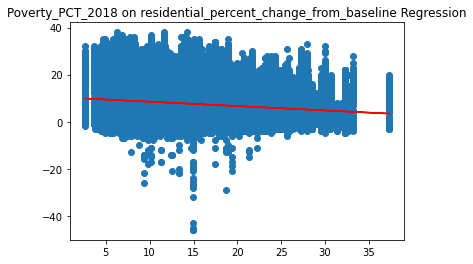

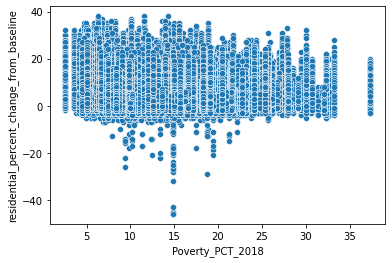

In [13]:
regress_two_var(df=mobility_counties,X="Poverty_PCT_2018",Y="residential_percent_change_from_baseline")

In [14]:
#mobility_counties[mobility_counties.UrbanCD == 1]

In [15]:
mobility_counties.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'Unnamed: 0', 'County_FIPS',
       'StateCD', 'Name', 'HS_DIPLOMA_ONLY_2018', 'SOME_COLLEGE_2018',
       'Poverty_PCT_2018', 'UrbanCD', 'Median_Income_2018'],
      dtype='object')

In [16]:
def multivariate_ols(input_df, Y, Xlist):
    # Reshape the df to avoid NAs
    dataframe = input_df
    dataframe = dataframe[dataframe['{Y}'.format(Y=Y)].isna() == False]
    # Clean out any rows where one of these is NA -- can lead to data loss
    for i in Xlist:
        dataframe = dataframe[dataframe[i].isna() == False]
    # Check to ensure not too much thrown away
    pct_preserved = dataframe.shape[0]/input_df.shape[0]
    print("{pct} percent of the data preserved as non-NA".format(pct = 100*round(pct_preserved,2)))
    Xvar =  dataframe[Xlist]#.values.reshape(-1, len(Xlist)) 
    Xvar = sm.add_constant(Xvar)
    Yvar = dataframe['{Y}'.format(Y=Y)].values.reshape(-1, 1) 
    mod = sm.OLS(endog=Yvar,exog=Xvar,)
    res = mod.fit()
    print(res.summary())
    return res

In [17]:
Xlist = ['HS_DIPLOMA_ONLY_2018',"Poverty_PCT_2018","Median_Income_2018","SOME_COLLEGE_2018"]

multivariate_ols(input_df=mobility_counties, Y="workplaces_percent_change_from_baseline", Xlist=Xlist)

97.0 percent of the data preserved as non-NA
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                 1.535e+04
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:22:29   Log-Likelihood:            -2.6291e+06
No. Observations:              647665   AIC:                         5.258e+06
Df Residuals:                  647660   BIC:                         5.258e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [18]:
list(mobility_counties.columns)

['country_region_code',
 'country_region',
 'sub_region_1',
 'sub_region_2',
 'metro_area',
 'iso_3166_2_code',
 'census_fips_code',
 'date',
 'retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline',
 'Unnamed: 0',
 'County_FIPS',
 'StateCD',
 'Name',
 'HS_DIPLOMA_ONLY_2018',
 'SOME_COLLEGE_2018',
 'Poverty_PCT_2018',
 'UrbanCD',
 'Median_Income_2018']

In [19]:
full_predictors = [
 'StateCD',
 'HS_DIPLOMA_ONLY_2018',
 'SOME_COLLEGE_2018',
 'Poverty_PCT_2018',
 'UrbanCD',
 'Median_Income_2018'
]

Ylist = ['retail_and_recreation_percent_change_from_baseline',
         'workplaces_percent_change_from_baseline',
         'residential_percent_change_from_baseline']

In [20]:
# https://stackoverflow.com/questions/1482308/how-to-get-all-subsets-of-a-set-powerset
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return set(chain.from_iterable(combinations(s, r) for r in range(len(s)+1)))'

ps = powerset(full_predictors)
ps_list = [list(i) for i in ps]

SyntaxError: EOL while scanning string literal (<ipython-input-20-ecd8fa55a581>, line 7)

In [21]:
#mobility_counties_dummies = pd.get_dummies(mobility_counties, columns=[ 'StateCD','UrbanCD'])

In [22]:
#mobility_counties_dummies

In [25]:
mobility_counties_samp = mobility_counties.sample(frac=.001)

In [28]:
mobility_counties_samp.UrbanCD.value_counts()

2     193
1     119
6      86
8      57
5      52
4      45
3      33
9      30
11     25
10     13
7      12
12      5
Name: UrbanCD, dtype: int64

In [43]:
mobility_counties

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,...,UrbanCD_3,UrbanCD_4,UrbanCD_5,UrbanCD_6,UrbanCD_7,UrbanCD_8,UrbanCD_9,UrbanCD_10,UrbanCD_11,UrbanCD_12
0,US,United States,Alabama,Autauga County,NaN,NaN,01001,2020-02-15,5.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,US,United States,Alabama,Autauga County,NaN,NaN,01001,2020-02-16,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,US,United States,Alabama,Autauga County,NaN,NaN,01001,2020-02-17,8.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,US,United States,Alabama,Autauga County,NaN,NaN,01001,2020-02-18,-2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,US,United States,Alabama,Autauga County,NaN,NaN,01001,2020-02-19,-2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670489,US,United States,Wyoming,Weston County,NaN,NaN,56045,2020-11-09,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
670490,US,United States,Wyoming,Weston County,NaN,NaN,56045,2020-11-10,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
670491,US,United States,Wyoming,Weston County,NaN,NaN,56045,2020-11-11,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
670492,US,United States,Wyoming,Weston County,NaN,NaN,56045,2020-11-12,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [33]:
mobility_counties = pd.get_dummies(mobility_counties, columns=["UrbanCD"])

In [46]:
mobility_counties.UrbanCD

AttributeError: 'DataFrame' object has no attribute 'UrbanCD'

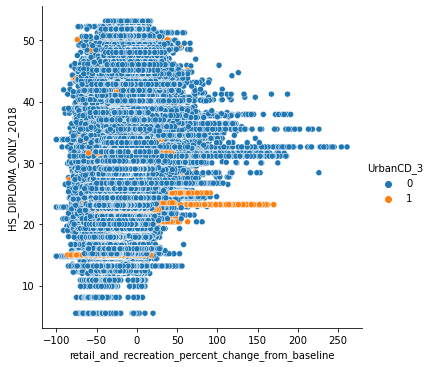

In [49]:
sns.relplot(data=mobility_counties, x="retail_and_recreation_percent_change_from_baseline", y="HS_DIPLOMA_ONLY_2018", hue="UrbanCD_3")

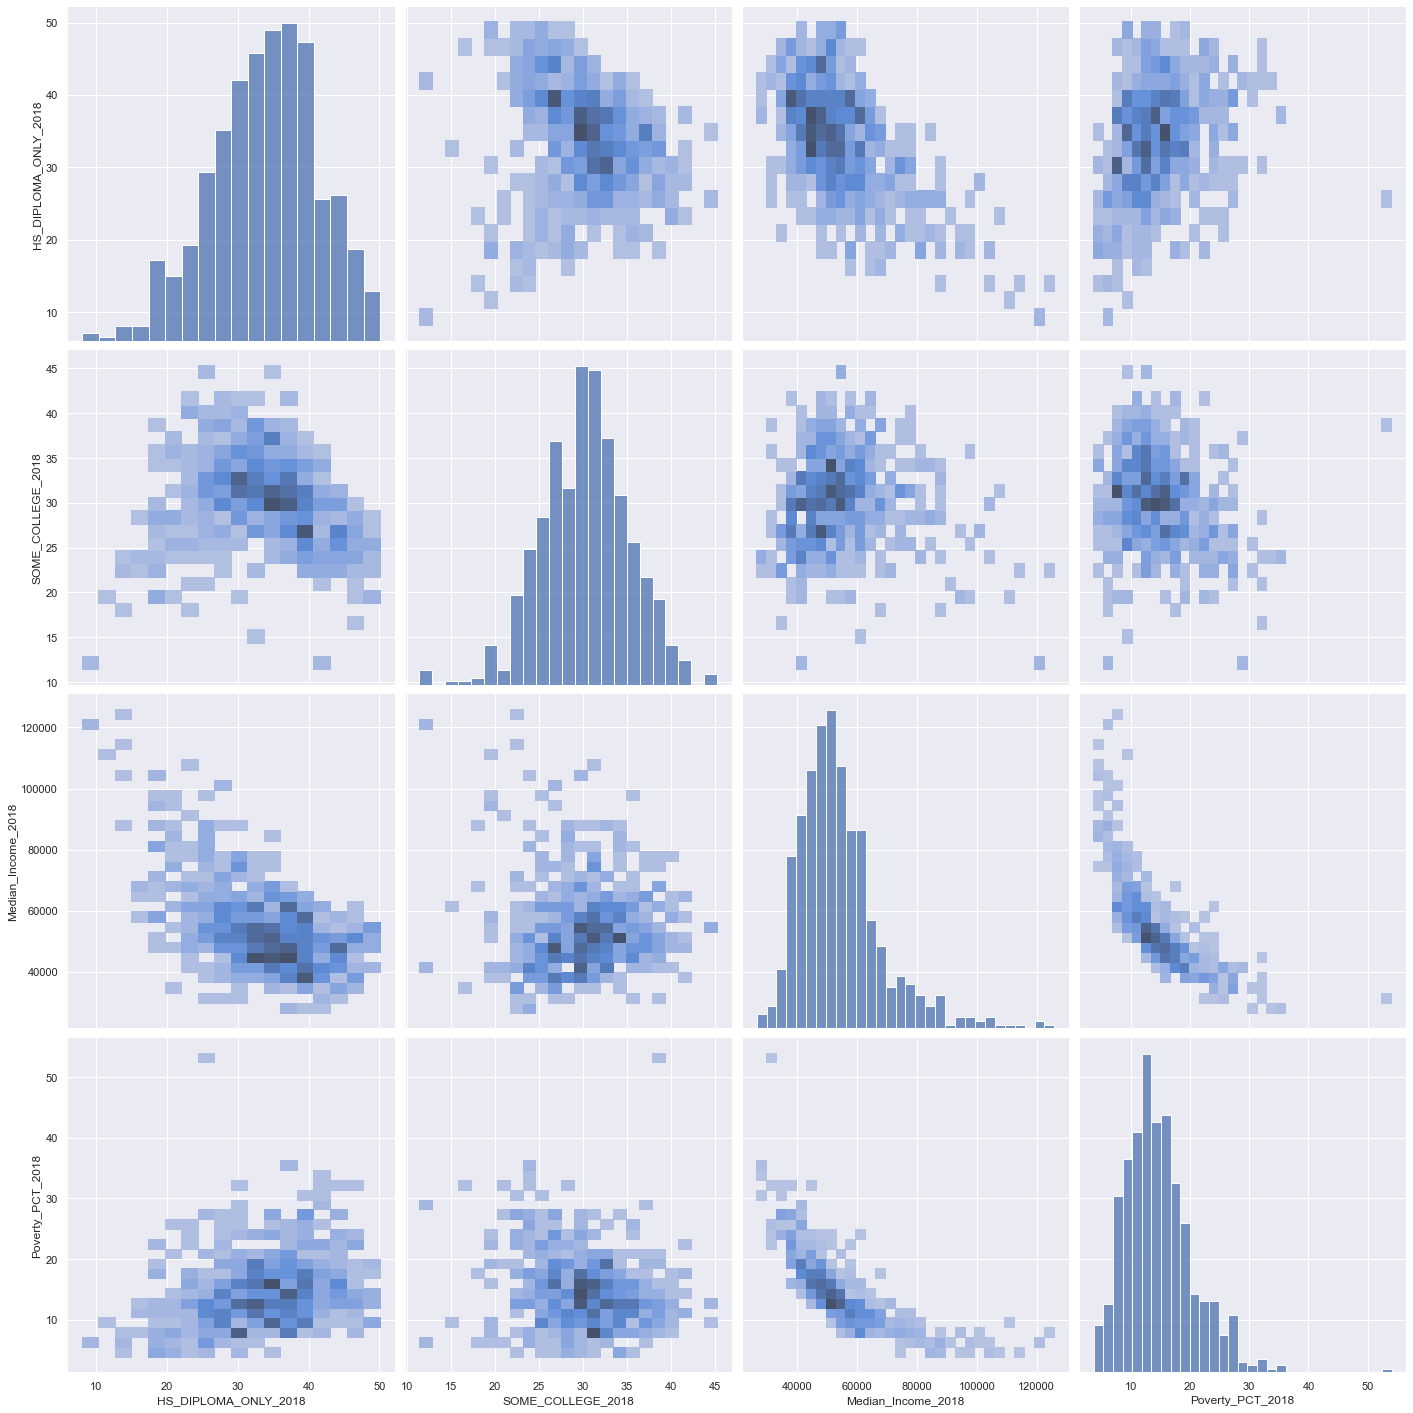

In [64]:
sns.pairplot(mobility_counties_samp[['HS_DIPLOMA_ONLY_2018',
 'SOME_COLLEGE_2018', 'Median_Income_2018',
 'Poverty_PCT_2018']], kind="hist", height=5)

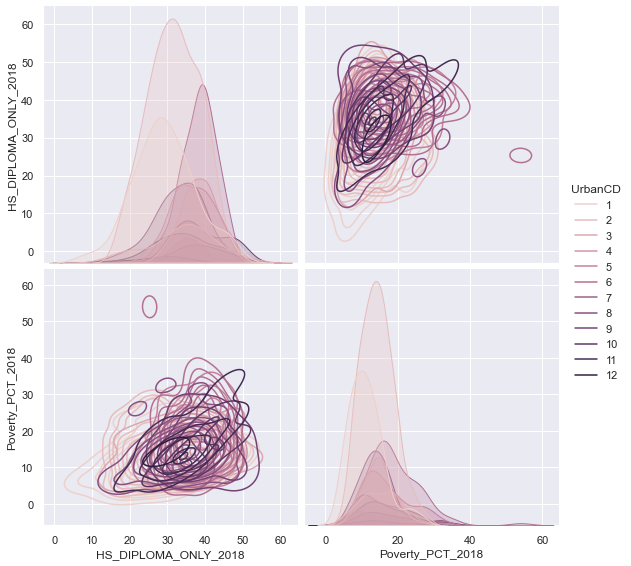

In [67]:
sns.pairplot(mobility_counties_samp[['HS_DIPLOMA_ONLY_2018',
 'Poverty_PCT_2018','UrbanCD']],hue="UrbanCD", kind="kde", height=4)

In [ ]:
Xlist = ['HS_DIPLOMA_ONLY_2018',"Poverty_PCT_2018","Median_Income_2018","SOME_COLLEGE_2018"]

multivariate_ols(input_df=mobility_counties, Y="workplaces_percent_change_from_baseline", Xlist=Xlist)

## R - Like Formula - Based OLS

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
test = mobility_counties[['HS_DIPLOMA_ONLY_2018',"Poverty_PCT_2018", "StateCD", "UrbanCD",
                   "Median_Income_2018","SOME_COLLEGE_2018","retail_and_recreation_percent_change_from_baseline"]].dropna()

test

In [ ]:
mod = smf.ols(formula='retail_and_recreation_percent_change_from_baseline ~ C(UrbanCD) + StateCD + UrbanCD*StateCD + Poverty_PCT_2018 + HS_DIPLOMA_ONLY_2018' , data=test)
res = mod.fit()

In [ ]:
print(res.summary())

## Bring in the COVID Data to be Joined In 

In [ ]:
covid = pd.read_csv(r"/Users/philip.ballentine/Documents/Scripts/covid_dataset_full.csv",dtype={'County_FIPS':'str'})

In [ ]:
covid.Date = covid.Date.astype("datetime64")

In [ ]:
mobility_counties['Date'] = mobility_counties['date']



In [ ]:
mobility_covid_urban = mobility_counties.merge(covid, on =['Date','County_FIPS'])

In [ ]:
# Can't deal with the + signs, so remove these 

large_columns = list(mobility_covid_urban.columns)
large_columns = [x.replace('+','') for x in large_columns]
mobility_covid_urban.columns = large_columns

rural_urban = pd.read_html("https://www.ers.usda.gov/data-products/urban-influence-codes/documentation.aspx")[0]
rural_urban
#https://www.ers.usda.gov/data-products/urban-influence-codes/documentation.aspx
rural_urban = pd.read_html("https://www.ers.usda.gov/data-products/urban-influence-codes/documentation.aspx")
rural_urban_frame = rural_urban[0]
goodlist = [str(i) for i in range(0,15)]
rural_urban_frame = rural_urban_frame[rural_urban_frame.Code.isin(goodlist)]
rural_urban_frame = rural_urban_frame[['Code','Description']]
rural_urban_frame.columns = ['UrbanCD','UrbanCD_Description']

for i in rural_urban_frame.UrbanCD_Description:
    print(i)
    
    
def discern_metro(x):
    if float(x) >= 1 and float(x) <=12:
        if x == 1:
            return 'Large_metro'
        if x == 2:
            return 'Smaller_metro' # under 1 mil
        if x in [3,5,8]:
            return 'Micropolitan'
        if x in [4,6,7,10]:
            return 'Noncore_adjacent'
        if x in [3,5,8]:
            return 'Noncore_remote'
    else:
        return np.NaN
    


## Define a Function for Formula-Based OLS

In [ ]:
def start_end_mulivariate_ols(formulatxt, startdate="2020-06-01", enddate="2020-11-01", df=mobility_covid_urban):
    segmented = mobility_covid_urban[mobility_covid_urban.date > '2020-06-01']
    segmented = segmented[segmented.date < '2020-11-01']
    mod = smf.ols(formula=formulatxt , data=segmented)
    res = mod.fit()
    print(res.summary())
    return res

In [ ]:
mobility_covid_urban.columns

In [ ]:
start_end_mulivariate_ols("""
workplaces_percent_change_from_baseline ~ HS_DIPLOMA_ONLY_2018 + C(Metro) +  C(Metro)*HS_DIPLOMA_ONLY_2018 + Division""")

#

In [ ]:
segmented.groupby('Division').workplaces_percent_change_from_baseline.describe()

In [ ]:
segmented = mobility_covid_urban[mobility_covid_urban.date > '2020-06-01']
segmented = segmented[segmented.date < '2020-07-01']
mod = smf.ols(formula='workplaces_percent_change_from_baseline ~ C(UrbanCD) + StateCD + C(UrbanCD)*C(StateCD)' , data=segmented)
res = mod.fit()
print(res.summary())